## 1. PCA
wine 데이터 세트의 13개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인하려 합니다. ###답안###을 채우세요.

In [ ]:
# 실습에 필요한 라이브러리를 실행해주세요.

import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# wine 데이터셋을 확인해주세요

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head(3)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


1-1. 와인 데이터 세트에 PCA를 적용해 13차원에서 2차원 PCA로 변환하세요.

In [ ]:
wine_scaled = StandardScaler().fit_transform(df.iloc[:, :-1]) # PCA를 바로 적용하기 전 개별 속성을 함께 스케일링

pca = PCA(n_components=2)

pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


1-2. 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화하세요.

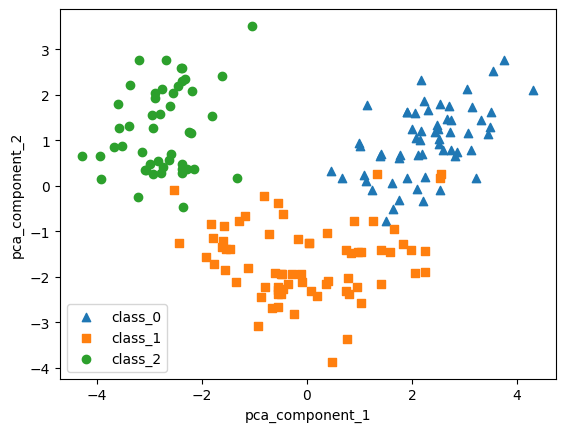

In [ ]:
pca_columns=['pca_component_1','pca_component_2']
df_pca = pd.DataFrame(wine_pca, columns = pca_columns)
df_pca['target']=wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pca_component_2를 y축으로
for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

1-3. 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 구하세요

In [ ]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


1-4. 1-3을 바탕으로 원본 데이터를 2차원으로 줄였을 때 원본 데이터의 변동성을 얼마나 설명할 수 있는지 간략히 서술하세요.

55%

## 2. LDA
wine 데이터 세트를 LDA 변환하려 한다. ###답안###을 채우세요.

2-1. 앞서 스케일링한 wine 데이터 세트를 2개의 컴포넌트로 LDA변환하세요

In [ ]:
lda =  LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)
print(wine_lda.shape)

(178, 2)


2-2. LDA 변환된 입력 데이터 값을 2차원 평면에 wine class별로 표현하세요.

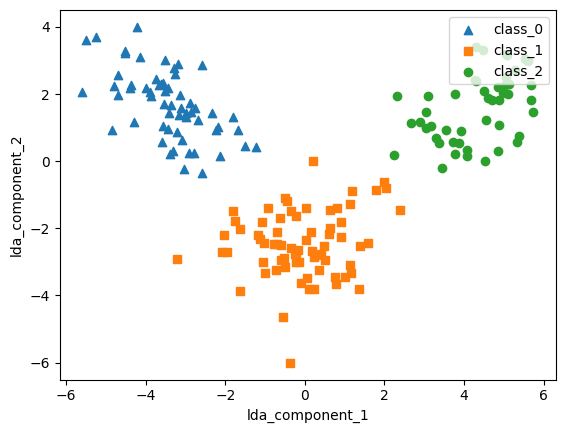

In [ ]:
lda_columns = ['lda_component_1', 'lda_component_2']
wineDF_lda = pd.DataFrame(wine_lda, columns=lda_columns)
wineDF_lda['target'] = wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data =  wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


## 3. SVD

#### 3-1. SVD 연산 생성 및 분해
- 랜덤한 3*3 행렬 A를 생성하고 SVD 분해 후 행렬 값을 출력해 주세요.

In [ ]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)

# 3x3 랜덤 행렬 A 생성
A =  np.random.randn(3,3)
print(np.round(A, 3))

# SVD 분해
U, Sigma, Vt = svd(A)

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

[[-0.212 -0.285 -0.574]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]
(3, 3) (3,) (3, 3)
U matrix:
 [[-0.056  0.489  0.87 ]
 [-0.472 -0.781  0.409]
 [ 0.88  -0.388  0.274]]
Sigma Value:
 [1.797 1.261 0.294]
V transpose matrix:
 [[ 0.913  0.275 -0.3  ]
 [-0.307 -0.019 -0.951]
 [ 0.268 -0.961 -0.067]]


#### 3-2. U, Σ, Vt로 행렬 A 복원
- Sigma 행렬을 다시 0을 포함한 대칭행렬로 변환한 뒤, 내적으로 복원을 수행해 주세요.

In [ ]:
# Sigma를 대칭행렬로 변환
Sigma_mat =np.diag(Sigma)

# 복원 행렬 A_
A_ = np.dot(np.dot(U, Sigma_mat), Vt)

print(np.round(A_, 3))

[[-0.212 -0.285 -0.574]
 [-0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014]]


#### 3-3. TruncatedSVD 변환
- wine 데이터셋을 계속 활용합니다.

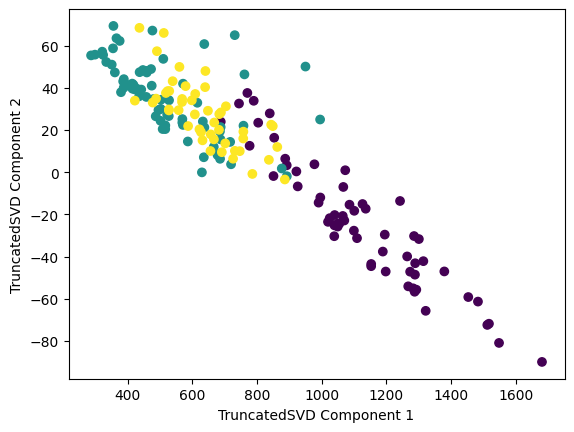

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd =  TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

# 산점도 2차원으로 시각화
plt.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

#### 3-4. 스케일링 + TruncatedSVD vs PCA 비교

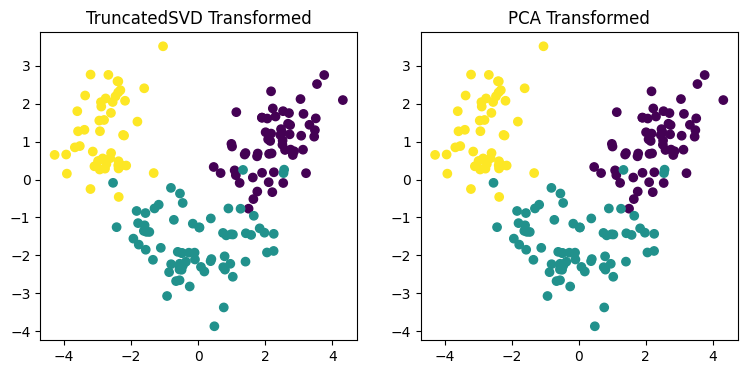

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 와인 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

# (왼) TruncatedSVD 변환 데이터 (오) PCA 변환 데이터 시각화
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
ax2.scatter(x=wine_pca[:, 0], y=wine_pca[:, 1], c=wine.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

plt.show()

## 4. NMF

#### 4-1. NMF 적용

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


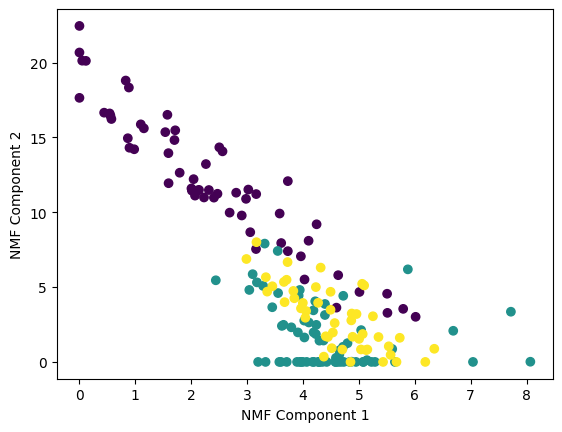

In [ ]:
from sklearn.decomposition import NMF

# NMF 객체 생성
nmf = NMF(n_components=2)
nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)

plt.scatter(x=wine_nmf[:, 0], y=wine_nmf[:, 1], c=wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()

## 5. T-SNE


#### 5-1. T-SNE를 이용한 차원 축소
- wine 데이터셋을 T-SNE를 이용하여 2차원으로 축소해 주세요.


In [ ]:
from sklearn.manifold import TSNE

# wine 데이터를 StandardScaler로 표준화
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# T-SNE 객체 생성 (n_components=2, random_state=42)
tsne = TSNE(n_components=2, random_state=42)

# T-SNE 변환 수행
wine_tsne = tsne.fit_transform(wine_scaled)

print('변환 전 차원:', wine_ftrs.shape)
print('변환 후 차원:', wine_tsne.shape)


변환 전 차원: (178, 13)
변환 후 차원: (178, 2)


#### 5-2. T-SNE 변환 데이터 시각화
- T-SNE로 변환된 데이터를 2차원 산점도로 시각화하고, wine의 클래스별로 다른 색상으로 표현해 주세요.


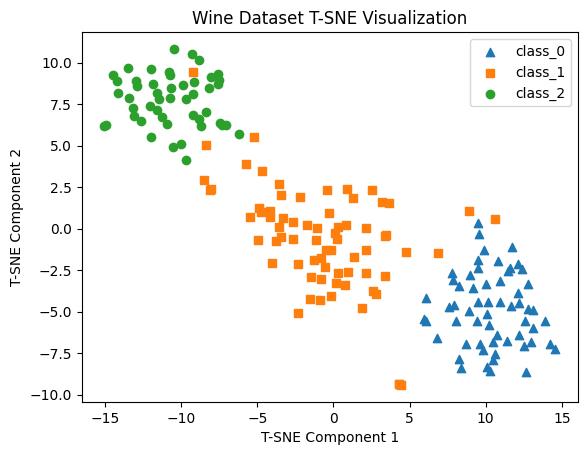

In [ ]:
# T-SNE 변환 결과를 DataFrame으로 생성
tsne_columns = ['tsne_component_1', 'tsne_component_2']
wineDF_tsne = pd.DataFrame(wine_tsne, columns=tsne_columns)
wineDF_tsne['target'] = wine.target

# class_0를 세모, class_1를 네모, class_2를 동그라미로 표시
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wineDF_tsne[wineDF_tsne['target']==i]['tsne_component_1']
    y_axis_data = wineDF_tsne[wineDF_tsne['target']==i]['tsne_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.title('Wine Dataset T-SNE Visualization')
plt.show()


#### 5-3. T-SNE와 PCA 비교 및 개념 확인
- 아래 질문에 답변해 주세요.


**Q1. 다음 O/X 문제를 풀어주세요.**
<br> X일 경우, 이유도 간략히 작성해 주세요.

1) T-SNE는 PCA와 달리 비선형 차원 축소 기법이다. (O / X)
2) T-SNE는 새로운 데이터가 들어왔을 때 기존 모델로 변환할 수 있다. (O / X)
3) T-SNE는 주로 데이터 시각화 목적으로 사용된다. (O / X)
4) T-SNE는 PCA보다 항상 빠르게 계산된다. (O / X)

O
x transform() 메서드가 없어서
O
x T-SNE는 PCA보다 속도가 느리다


**Q2. 5-2에서 시각화한 T-SNE 결과와 1-2에서 시각화한 PCA 결과를 비교했을 때, 클래스 분리 측면에서 어떤 차이가 있는지 간략히 서술하세요.**

 t-SNE가 클래스 간 분리가 PCA가 비해 명확하다.


# 캐글 노트북 필사 - Dimensionality Reduction Demystified for Beginners

In [15]:
#Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

# Breast cancer dataset
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

In [16]:
# A Function to Plot labelled Scatter Plot
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

Dimensionality Reduction \
An Important family of unsupervised learning methods that fall into the transformation category are known as dimensionality reduction algorithms. As the name suggests, this kind of transform takes your original dataset that might contain say, 200 features and finds an approximate version of dataset that uses, say, only 10 dimensions. One very common need for dimensionality reduction arises when first exploring a dataset, to understand how the samples may be grouped or related to each other by visualizing it using a two-dimensional scatterplot as shown.

Types of Simple Dimensionality Reduction Algorithms/Methods\

1. Principle Component Analysis (PCA)
2. Multi-dimensional Scaling (MDS)
3. T-distributed Stochastic Neighbor Embedding (t-SNE)

\
1. Principle Component Analysis (PCA) :
One very important form of dimensionality reduction is called principal component analysis, or PCA. Intuitively, what PCA does is take your cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated. PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset.

Mathematically : (For My Fellow Nerds Out There, I Hear You)
The principal components of a collection of points in a real p-space are a sequence of direction vectors where the vector is the direction of a line that best fits the data while being orthogonal to the first vectors.

How it Works :
PCA WORKS

Here, if we have two original features (X1
 & X2)
 that are highly correlated represented by this cloud of points, PCA will rotate the data so the direction (v1)
 of highest variance - called the first principal component (PC1)
, which is along the long direction of the cloud, becomes the first dimension. It will then find the direction (v2)
 at right angles that maximally captures the remaining variance. This is the second principle component (PC2)
. In two dimensions, there's only one possible such direction at right angles of the first principal component, but for higher dimensions, there would be infinitely many. With more than two dimensions, the process of finding successive principal components at right angles to the previous ones would continue until the desired number of principal components is reached.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
#This can be done by using StandardScaler of sklearn Library
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm) #Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


Plotting the PCA-Transformed Version of the Breast Cancer Dataset :\
As, You can see the no. of Features of the DataSet are reduced to 2 and Yes, some of the information is lost while using PCA but it comes with the added benefit of better understanding of relation Between Features and better Visualization Capabilities as there are only 2 features

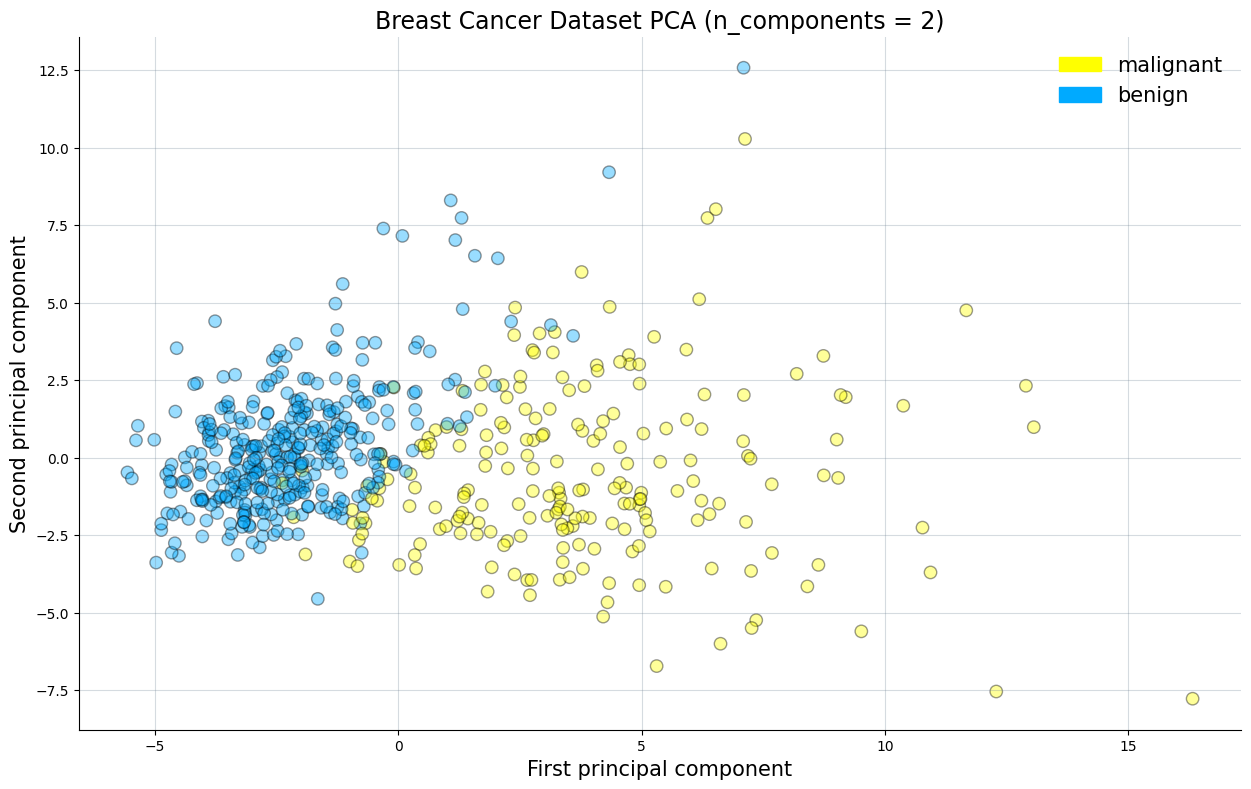

In [18]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

#Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

Now, We can see that the two target classes are easily seperable even by a simple logistic regression. Hence, In this case the PCA gave Results which were not only easy to Interpret but also easy to Classify

Using PCA to get feature Co-Relation Between the Initial 30 Features
PCA Offers a attribute '.components_' that stores Co-relation Between all the high and low Variance Pair of Feature that were generated During Fitting of PCA object and these Co-Relation Values can utilized and Visualized By Using a Heatmap

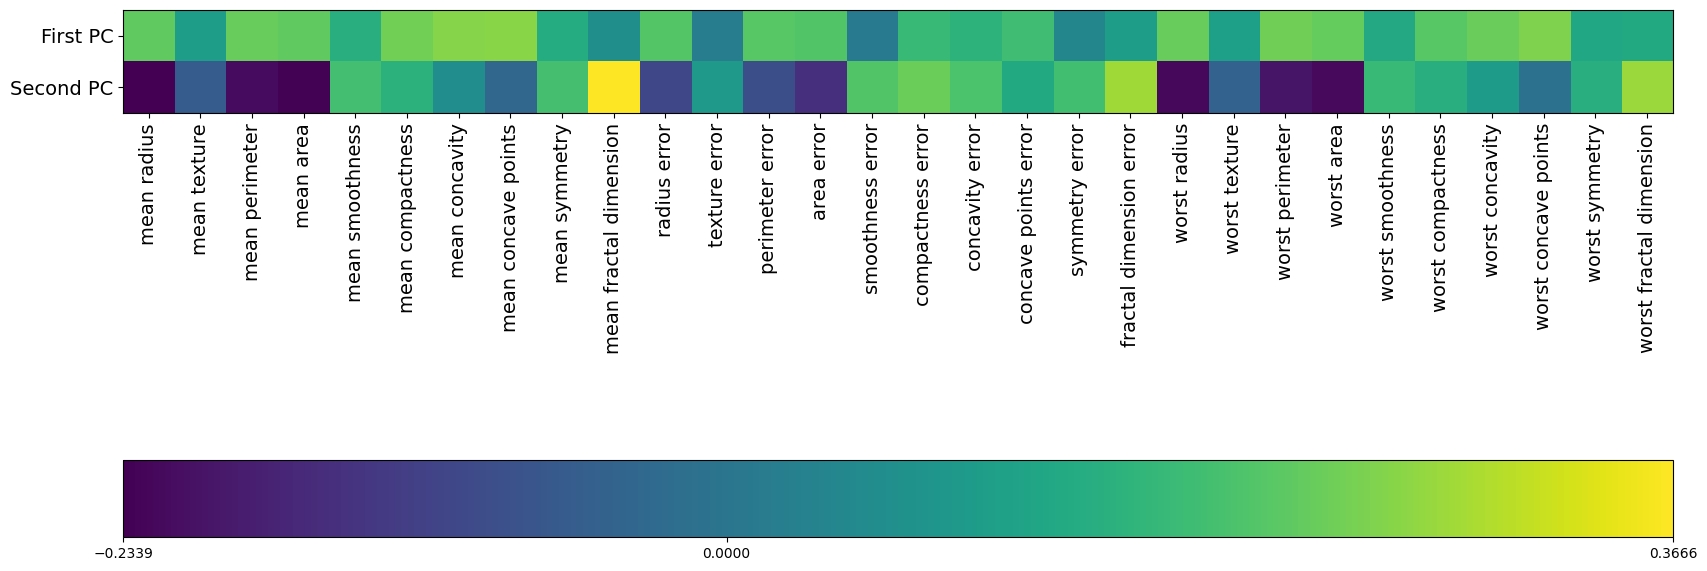

In [19]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5);

We can see that the first principle component is all positive, showing a general correlation between all 30 features. In other words, they tend to vary up and down together. The second principle component has a mixture of positive and negative signs; but in particular, we can see a cluster of negatively signed features that co-vary together and in the opposite direction of the remaining features. Looking at the names, it makes sense the subset wold co-vary together. We see the pair mean texture and worst texture and the pair mean radius and worst radius varying together and so on.

Remarks on PCA
PCA gives a good initial tool for exploring a dataset. As it fast and works on almost all type of DataSets, but it may not be able to find more subtle groupings that produce better visualizations for more complex datasets.

2. Multi-Dimensional Scaling : (MDS)
There is a family of unsupervised algorithms called Manifold Learning Algorithms that are very good at finding low dimensional structure in high dimensional data and are very useful for visualizations. One classic example of a low dimensional subset in a high dimensional space is this data set, The 'Swiss Role DataSet' as shown, in three dimensions. Hhere the points all lie on a two-dimensional sheet with an interesting shape. This lower dimensional sheet within a higher dimensional space is called the manifold. PCA is not sophisticated enough to find this interesting structure. One widely used manifold learning method is called multi-dimensional scaling, or MDS.

Types of MDS :\
There are many flavors of MDS, but they all have the same general goal; to visualize a high dimensional dataset and project it onto a lower dimensional space - in most cases, a two-dimensional page - in a way that preserves information about how the points in the original data space are close to each other. In this way, you can find and visualize clustering behavior in your high dimensional data.

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


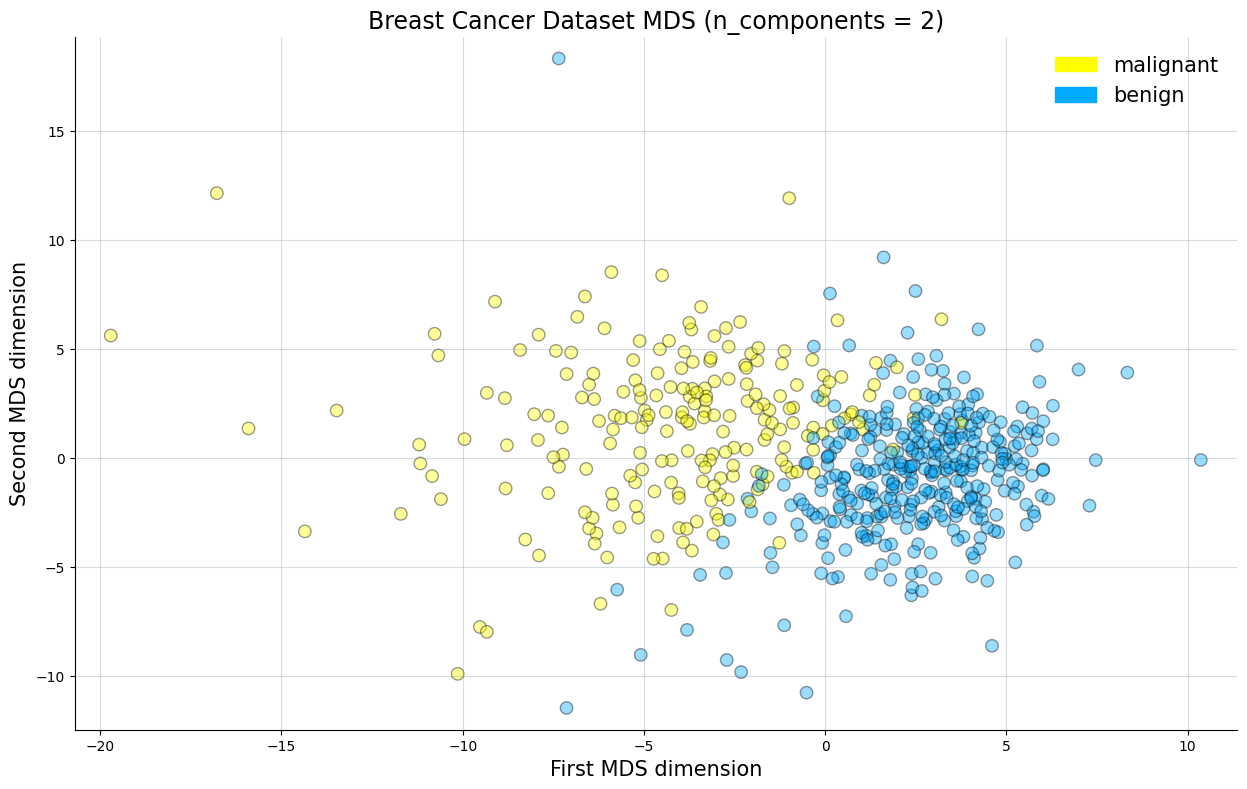

In [20]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);

Remarks on MDS :
You can see, That MDS did a similar job to PCA but there is a diffrence between MDS and PCA distribution and that is because both algorithms works on different principles and uses different mathematical models. You can read about the Maths behind the algorithms in the skikit learn documentation along with various other parameters you can play with. but that section is out of scope of this Notebook

3. T-distributed Stochastic Neighbor Embedding (t-SNE)
An especially powerful manifold learning algorithm for visualizing your data is called t-SNE. t-SNE finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset. In particular, t-SNE gives much more weight to preserving information about distances between points that are neighbors.

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


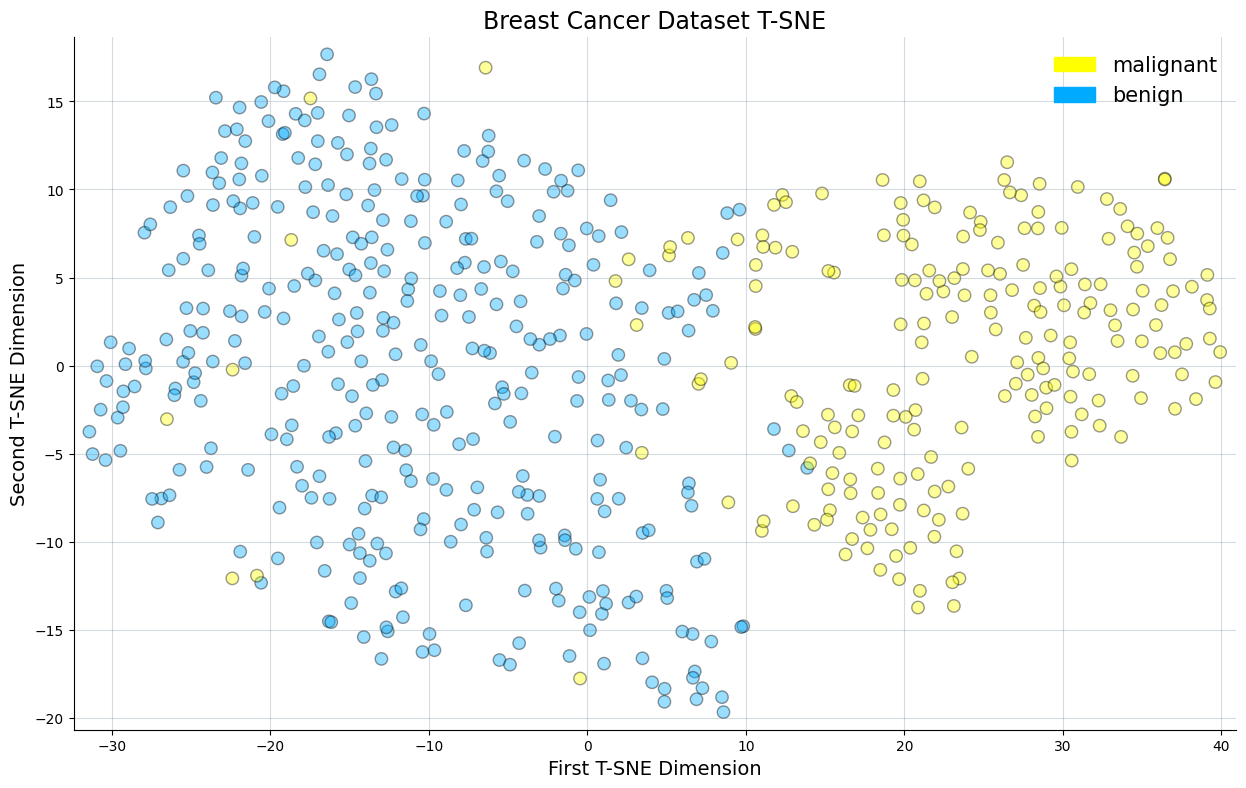

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

Remarks on T-SNE :
The interesting thing here is that T-SNE also does a rather good job of finding structure in this Breast Cancer Dataset, which reminds us that we should try at least a few different approaches when visualizing data using manifold learning to see which works best for a particular dataset. T-SNE tends to work better on datasets that have more well-defined local structure; in other words, more clearly defined patterns of neighbors.

Conclusion :
This was a breif Introduction to Dimensional Reduction, This is a very vast topic and we have only scratched the surface in this notebook. I am hoping that this notebook would be helpful to you. And remeber reading the documentation is the best way to learn about new methods and parameters to play with.